# COVID-19 Global Data Tracker

## 🚩 Project Objectives:

- ✅ Import and clean COVID-19 global data
- ✅ Analyze time trends (cases, deaths, vaccinations)
- ✅ Compare metrics across countries/regions
- ✅ Visualize trends with charts and maps
- ✅ Communicate findings in a Jupyter Notebook or PDF report

### Data Loading & Exploration

#### Goal: Load the dataset and explore its structure.

#### ✅ Tasks:

- Load data using pandas.read_csv().
- Check columns: df.columns.
- Preview rows: df.head().
- Identify missing values: df.isnull().sum().

#### ✅ Tools:

- pandas

#### 📌 Key columns:

- date
- country
- total_cases
- total_deaths
- new_cases
- new_deaths
- total_vaccinations
- etc.

In [35]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("owid_covid19.csv")

# Check columns
print(df.columns)

# Preview the first few rows
print(df.head(5))

# Check for missing values
df.isnull().sum()


Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

country                            0
date                               0
total_cases                    15202
new_cases                      17961
new_cases_smoothed             19177
                               ...  
extreme_poverty               184917
diabetes_prevalence            78218
handwashing_facilities        273340
hospital_beds_per_thousand    197101
human_development_index        98970
Length: 61, dtype: int64

### 3️⃣ Data Cleaning

Goal: Prepare data for analysis.

### ✅ Tasks:

- Filter countries of interest (e.g., Kenya, USA, India).
- Drop rows with missing dates/critical values.
- Convert date column to datetime: pd.to_datetime().
- Handle missing numeric values with fillna() or interpolate().

### ✅ Tools: pandas

In [36]:
# Filter countries of interest
countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 'Somalia', 'South Sudan']
df = df[df['country'].isin(countries)]

# Drop rows with missing date or critical columns
df.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Fill or interpolate numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')


### 4️⃣ Exploratory Data Analysis (EDA)

Goal: Generate descriptive statistics & explore trends.

### ✅ Tasks:

- Plot total cases over time for selected countries.
- Plot total deaths over time.
- Compare daily new cases between countries.
- Calculate the death rate: total_deaths / total_cases.

### ✅ Visualizations:

- Line charts (cases & deaths over time).
- Bar charts (top countries by total cases).
- Heatmaps (optional for correlation analysis).

### ✅ Tools: matplotlib, seaborn

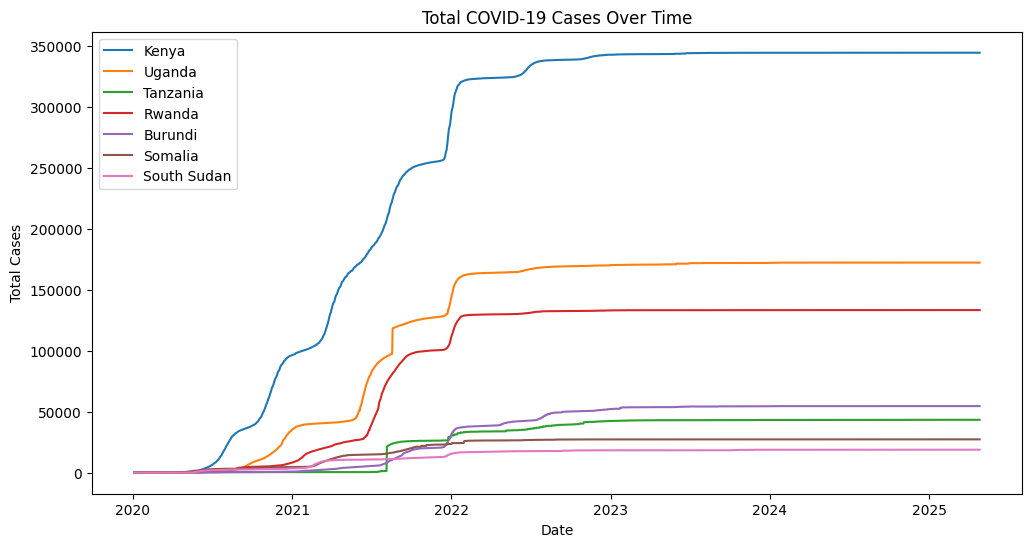

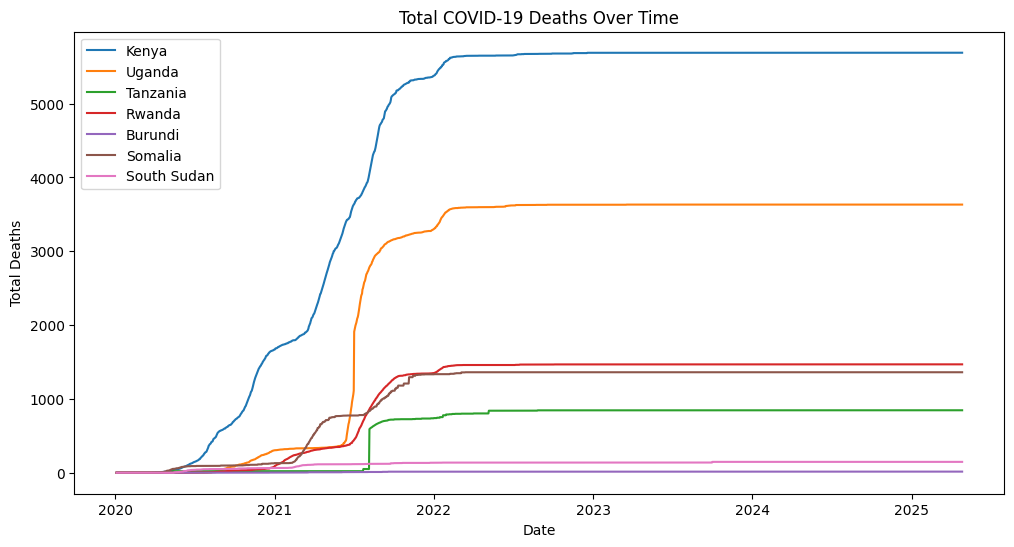

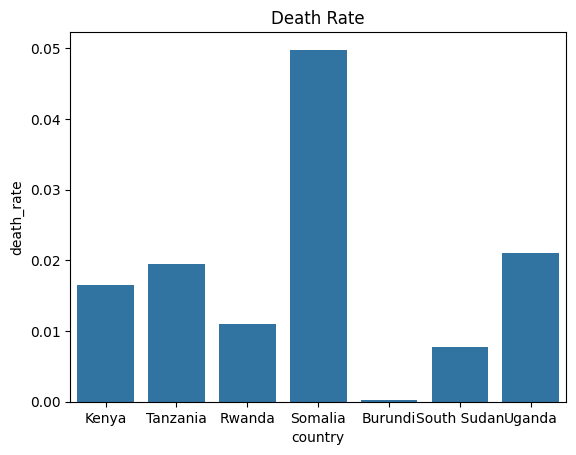

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

# Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.show()


# Sort values to ensure correct line plotting
filtered_df = df.sort_values(by=['country', 'date'])
#print(filtered_df)
# Plot
fig = px.line(
    filtered_df,
    x='date',
    y='new_cases',
    color='country',
    title='Daily New COVID-19 Cases by Country',
    labels={'new_cases': 'New Daily Cases', 'date': 'Date'}
)
fig.update_layout(template='plotly_white')
fig.show()


# Calculate and compare death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']
latest = df.sort_values('date').groupby('country').tail(1)
sns.barplot(data=latest, x='country', y='death_rate')
plt.title("Death Rate")
plt.show()


### 5️⃣ Visualizing Vaccination Progress

Goal: Analyze vaccination rollouts.

#### ✅ Tasks:

- Plot cumulative vaccinations over time for selected countries.
- Compare % vaccinated population.

#### ✅ Charts:

- Line charts.

#### Optional: Pie charts for vaccinated vs. unvaccinated.

#### ✅ Tools: matplotlib, seaborn

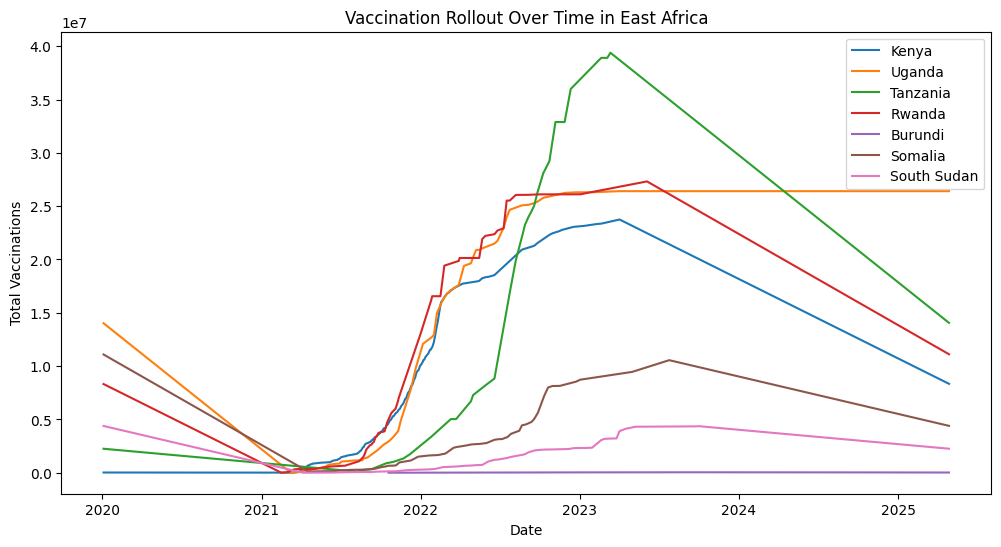

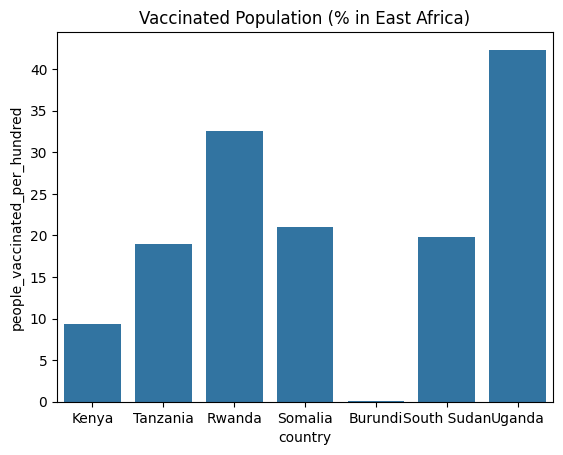

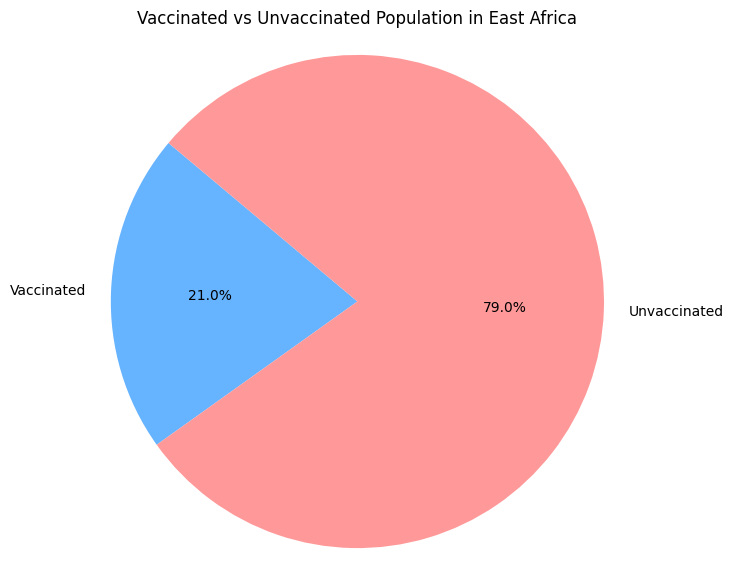

In [ ]:
# Plot total vaccinations over time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title("Vaccination Rollout Over Time in East Africa")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.show()

# Compare vaccination percentages
latest = df.sort_values('date').groupby('country').tail(1)
sns.barplot(data=latest, x='country', y='people_vaccinated_per_hundred')
plt.title("Vaccinated Population (% in East Africa)")
plt.show()

# Pie chart to show sum of vaccinations in all countries with unvaccinated population
# Sum up vaccinated and total population
total_vaccinated = df['people_vaccinated'].sum()
total_population = df['population'].sum()

# Calculate unvaccinated population
unvaccinated = total_population - total_vaccinated

labels = ['Vaccinated', 'Unvaccinated']
sizes = [total_vaccinated, unvaccinated]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Vaccinated vs Unvaccinated Population in East Africa')
plt.axis('equal')
plt.show()


### 6️⃣ Optional: Build a Choropleth Map

Goal: Visualize cases or vaccination rates by country on a world map.

#### ✅ Tools: Plotly Express

#### ✅ Tasks:

- Prepare a dataframe with iso_code, total_cases for the latest date.
- Plot a choropleth showing case density or vaccination rates.

In [39]:
import plotly.express as px
import pandas as pd
import pycountry

# Load the CSV file
df = pd.read_csv("owid_covid19.csv")

#df = df[df['country'].isin(countries)]

# Drop rows with missing date or critical columns
df.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Fill or interpolate numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')

# Helper to convert country names to ISO-3 codes
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Prepare latest data
latest_global = df.sort_values('date').groupby('country').tail(1)

# Add a new column for ISO codes
latest_global["iso_alpha"] = latest_global["country"].apply(get_iso3)

#Remove all rows with missing ISO codes
latest_global = latest_global.dropna(subset=["iso_alpha"])

# Remove rows with missing codes
latest_global = latest_global.dropna(subset=["iso_alpha"])

fig = px.choropleth(
    latest_global,
    locations="iso_alpha",  # ISO-3 country codes
    color="total_cases",
    hover_name="country",
    title="Total COVID-19 Cases by Country",
    color_continuous_scale="Reds"
)
fig.show()



### 7️⃣ Insights & Reporting

#### Summarized findings and highlighted patterns or anomalies for the following East Africa countries: Kenya, Uganda, Tanzania, Rwanda, Burundi, Somalia and South Sudan

---

#### Key Insights:

1. All countries saw a decline in new cases over the period, with Rwanda showing the steepest decline.

2. Uganda had a significantly lower number of new cases throughout the period compared to its neighbors, suggesting more effective containment or underreporting.

3. Despite having a lower GDP per capita, Rwanda achieved a notable level of vaccinations, reflecting efficient public health policies.

4. The **choropleth map** shows a high concentration of total COVID-19 cases in **USA** and **China**, aligning with population density trends.

5. Tanzania showed a sharp increase in vaccination rollout on 2023-2024 with 39,392,420.0 vaccinations.

---

#### ⚠️ Anomalies or Interesting Patterns:

- **All countries** have zero reported new cases for an extended period, which could indicate data reporting issues or exceptional control.

- **Somalia** displayed a high death rate compared to other countries while having the lowest number of COVID cases, which could indicate a lack of healthcare capacity or reporting issues.

---
